# Logistic Regression

🎯 Up until now, you have been modeling a regression task. This time, you are going to be modeling a classification task, on the famous Titanic dataset.

👇 Load the `titanic.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [42]:
import pandas as pd

df = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv')

df.head()
df.shape

(891, 12)

```markdown
Variable    Definition      Key

survival    Survival        0 = No, 1 = Yes
pclass      Ticket class    1 = 1st, 2 = 2nd, 3 = 3rd
sex         Sex
Age         Age in years
sibsp       # of siblings / spouses aboard the Titanic
parch       # of parents / children aboard the Titanic
ticket      Ticket number
fare        Passenger fare
cabin       Cabin number
embarked    Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
```

# 1. Model evaluation

👇 We want to predict whether a passenger survived (`Survived`) the Titanic disaster, according to the following features:

- The class in which she/he was travelling (`Pclass`)
- The number of siblings/spouses he had onboard (`SibSp`)
- The number of parents/children he had onboard (`Parch`)
- The fare he paid for the ticket (`Fare`)

❓How accurate would a [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model be at such a task? Cross-validate the model and save the mean accuracy under variable name `accuracy`.

In [41]:
# YOUR CODE HERE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


features = ['Pclass', 'SibSp', 'Parch', 'Fare']
X = df[features]
y = df['Survived']

# Create the Logistic Regression model
logreg = LogisticRegression()

scores = cross_val_score(logreg, X, y, cv=5)

accuracy = scores.mean()
accuracy

0.6835791852363318

### ☑️ Check your code

In [5]:
from nbresult import ChallengeResult

result = ChallengeResult('accuracy',
                         accuracy = accuracy
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/01-Fundamentals-of-Machine-Learning/data-logistic-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_accuracy.py::TestAccuracy::test_accuracy PASSED                     [100%]

============================== 1 passed in 0.29s ===============================


💯 You can commit your code:

git add tests/accuracy.pickle

git commit -m 'Completed accuracy step'

git push origin master



In [6]:
! git add tests/accuracy.pickle

! git commit -m 'Completed accuracy step'

! git push origin master

[master 5153b22] Completed accuracy step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/accuracy.pickle
Enumerating objects: 15, done.
Counting objects: 100% (15/15), done.
Delta compression using up to 4 threads
Compressing objects: 100% (14/14), done.
Writing objects: 100% (15/15), 5.12 KiB | 1.02 MiB/s, done.
Total 15 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (3/3), done.
To github.com:juliensoudet/data-logistic-regression.git
 * [new branch]      master -> master


# 2. In-depth diagnosis

❓ We've evaluated the accuracy of the model at predicting, but we want to investigate its performance in more depth. Is the model overfitting? Underfitting? How many learning examples does it need to learn optimally on the given features?

<br/>

<details>
<summary> ℹ️ What do we want? </summary>   
    
<br/>
We want learning curves.
    
</details>


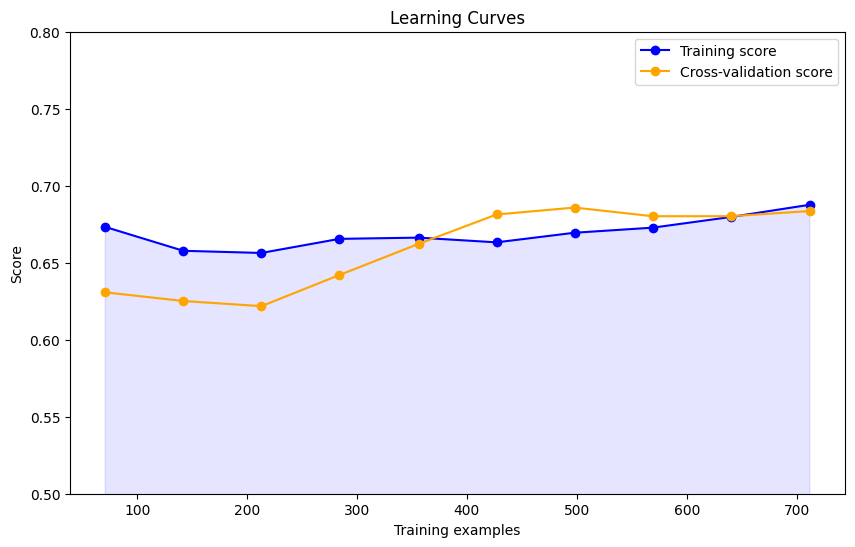

In [12]:
# YOUR CODE HERE
from sklearn.model_selection import learning_curve
import numpy as np 
import matplotlib.pyplot as plt

logreg = LogisticRegression()

train_sizes, train_scores, test_scores = learning_curve(logreg, X, y, cv=5,train_sizes=np.linspace(0.1, 1.0, 10) )


train_scores_mean = np.mean(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean, alpha=0.1,color="blue")
plt.fill_between(train_sizes, test_scores_mean,test_scores_mean, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Cross-validation score")
plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.ylim(0.5,0.8)
plt.show()


<details>
<summary> ℹ️ Once you have completed your diagnosis, unfold this cell for our interpretation </summary>   
    
<br/>
You should have plotted the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html">learning curves</a>.

👉 The curves should have converged:
- The model is not overfitting (no variance): it generalizes well.

👉 The test score stops increasing around 500 training observations:
- The model does not need more than 500 training observations to perform optimally on the given features.
    
</details>


# 3. Reduced training size

👇 Evaluate a model on the training size suggested by the curves. Are you able to maintain a similar accuracy? Save the new accuracy under variable name `reduced_training_accuracy`

In [38]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

reduced_train_size = 500

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_reduced_train = X_train[:reduced_train_size]
y_reduced_train = y_train[:reduced_train_size]

logreg = LogisticRegression()
logreg.fit(X_reduced_train, y_reduced_train)

y_pred = logreg.predict(X_val)

reduced_training_accuracy = accuracy_score(y_val, y_pred)
reduced_training_accuracy

0.7150837988826816

ℹ️ The accuracy should be nearly the same, with a reduced computational expense.

### ☑️ Check your code

In [35]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_accuracy',
                         accuracy = reduced_training_accuracy
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/01-Fundamentals-of-Machine-Learning/data-logistic-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_reduced_accuracy.py::TestReduced_accuracy::test_accuracy PASSED     [100%]

============================== 1 passed in 0.38s ===============================


💯 You can commit your code:

git add tests/reduced_accuracy.pickle

git commit -m 'Completed reduced_accuracy step'

git push origin master



In [13]:
! git add tests/reduced_accuracy.pickle

! git commit -m 'Completed reduced_accuracy step'

! git push origin master

[master a80a9c7] Completed reduced_accuracy step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/reduced_accuracy.pickle
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 527 bytes | 527.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:juliensoudet/data-logistic-regression.git
   5153b22..a80a9c7  master -> master


# 4. Predictions

❓ Did the following person survive the Titanic disaster?

- Travelled in class 1 (`Pclass`)
- Had no spouse or siblings on board(`SibSp`)
- Had no parents or children on board (`Parch`)
- Paid 15 for his ticket (`Fare`)

Create and fit a new model (remember, `cross_validate` doesn't return a fitted model).

⚠️ Make sure the model you use for predicting has the **least computational expense possible**. Save the prediction under variable name `prediction`.

In [40]:
# YOUR CODE HERE
person_features = [[1, 0, 0, 15]]

logreg = LogisticRegression()

y_reduced_train = y_train[:reduced_train_size]


logreg.fit(X_reduced_train, y_reduced_train)


prediction = logreg.predict(person_features)
prediction [0]


/Users/Laetitia/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

❓ What is the probability that the person survived? Compute your answer and save it under variable name `probability`.

<br/>

<details>
    <summary markdown='span'>💡 Hint</summary>

To return the predicted probabilities from a fitted sklearn Classifier, have a look at the method `.predict_proba()`
</details>

In [24]:
# YOUR CODE HERE
probability = logreg.predict_proba(person_features)[0][1]
probability

/Users/Laetitia/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.5741351626570892

### ☑️ Check your code

In [25]:
from nbresult import ChallengeResult

result = ChallengeResult('predictions',
                         prediction = prediction,
                         probability = probability
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/01-Fundamentals-of-Machine-Learning/data-logistic-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 3 items

test_predictions.py::TestPredictions::test_prediction_is_1 PASSED        [ 33%]
test_predictions.py::TestPredictions::test_probability PASSED            [ 66%]
test_predictions.py::TestPredictions::test_probability_type PASSED       [100%]

============================== 3 passed in 0.43s ===============================


💯 You can commit your code:

git add tests/predictions.pickle

git commit -m 'Completed predictions step'

git push origin master



In [26]:
! git add tests/predictions.pickle

! git commit -m 'Completed predictions step'

! git push origin master


[master 26e3363] Completed predictions step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/predictions.pickle
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 592 bytes | 592.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:juliensoudet/data-logistic-regression.git
   a80a9c7..26e3363  master -> master


# 5 Optional - Model Calibration
*Can you trust the predicted probabilities?* 🤔

- ❗️ Accuracy only evaluate your model performance based on the predicted **classes** 0s and 1s (obtained via`.predict()`)
- ❗️ High accuracy does not necessarily mean that predicted **probabilities** are "calibrated" (obtained via `.predict_probas()`)

What does "calibrated" probabilities mean? 
> _Among the samples to which your model gave a predict_proba value close to 0.9, approximately 90% actually belong to the positive class._

<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/math/logistic-regression.png'>

❓ **Question 1**: Read more about [Calibration](https://scikit-learn.org/stable/modules/calibration.html) on sklearn docs

❓ **Question 2**: Try to implement [`CalibrationDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibrationDisplay.html) to check if you model is calibrated (on a holdout test set)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibrationDisplay
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.5, random_state=1)

# Fit a model on the train set


# Print calibration curve on the test set


<details>
    <summary markdown='span'>ℹ️ Interpreting the calibration curves</summary>

If for the previous prediction you got a probability of around 0.65 then, if the model was well-calibrated, 65% of the cases that model assigns a probability of 0.65 would _actually_ have the class 1 ("Survived" in our case).
    
But from our calibration curves we can notice, that when the model predicts 0.65, there's actually _less_ (below the curve) real fraction of cases with class 1.
</details>

❓ **Question 3**: Try to calibrate your model using sklearn's [`CalibratedClassifierCV`](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html), and compute your new probability of survival. 

> Note that logistic regression models are already generally well calibrated because they try to minimize the log-loss. Refer to lecture https://kitt.lewagon.com/camps/👉YOUR_CAMP_NUMBER👈/lectures/content/04-Decision-Science_04-Logistic-Regression.slides.html?title=Logistic-Regression#/2/7/0

In [ ]:
# YOUR CODE HERE

<details>
    <summary markdown='span'>ℹ️ Interpreting the new probability</summary>

Our previous model tended to slightly _overestimate_ probabilities around the middle range (for example, there were actually less than 65% of class 1 cases when model was predicting probability of 0.65).
    
Calibration seems to have made our model slightly _underestimate_ those probabilities 🙃; for example, when the model predicts a probability of 0.5 the real fraction of cases with class 1 is more than that.
</details>

# 🏁